## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = np.array([self._predict(x) for x in X])
        return predictions
    
    def _predict(self, x):
        # Compute Euclidean distances between x and all examples in the training set
        distances = np.array([self._euclidean_distance(x, x_train) for x_train in self.X_train])
        
        # Sort by distance and return the indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Calculate the mean of the target values of the k nearest neighbors
        k_nearest_values = [self.y_train[idx] for idx in k_indices]
        return np.mean(k_nearest_values)
        
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

## Load Dataset

In [10]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Prepare the dataset

In [19]:
X = dataset.values
X = dataset.iloc[:,0].values.reshape(-1, 1) # just took one feature for visualization purpose , You can take all the feature 
y = dataset.iloc[:,-1].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

## Train the KNN Regressor

In [20]:
regressor = KNN(k=3)
regressor.fit(X_train, y_train)

## Make predictions

In [21]:
predictions = regressor.predict(X_test)

## Visualize the results

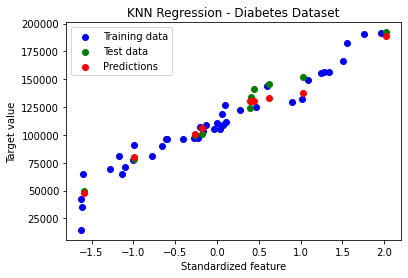

In [22]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predictions on the test data
plt.scatter(X_test, predictions, color='red', label='Predictions')

# Add labels and legend
plt.xlabel('Standardized feature')
plt.ylabel('Target value')
plt.legend()
plt.title('KNN Regression - Diabetes Dataset')
plt.show()